In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 54]
[nltk_data]     Connection reset by peer>


In [2]:
data=pd.read_csv("IMDB Dataset.csv")


In [106]:
data.head(10)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
def clean_review(review):
    str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [6]:
!pip install wordcloud

In [7]:
from wordcloud import WordCloud

In [8]:
print(data.columns)

Index(['review', 'sentiment'], dtype='object')


In [9]:
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'neg'].astype(str))



In [10]:
print(data.columns)
print(data['review'].head())
print(data['sentiment'].unique())


Index(['review', 'sentiment'], dtype='object')
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object
['positive' 'negative']


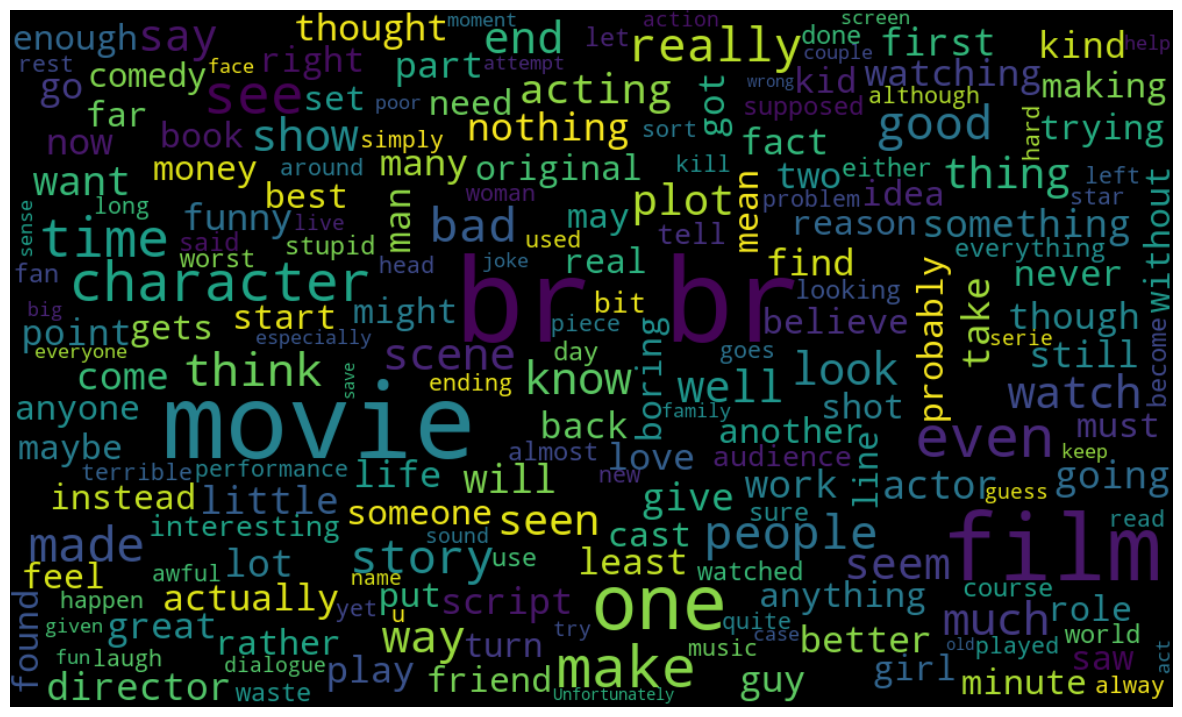

In [11]:
reviews = ' '.join(data['review'][data['sentiment'] == 'negative'].astype(str))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(reviews)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


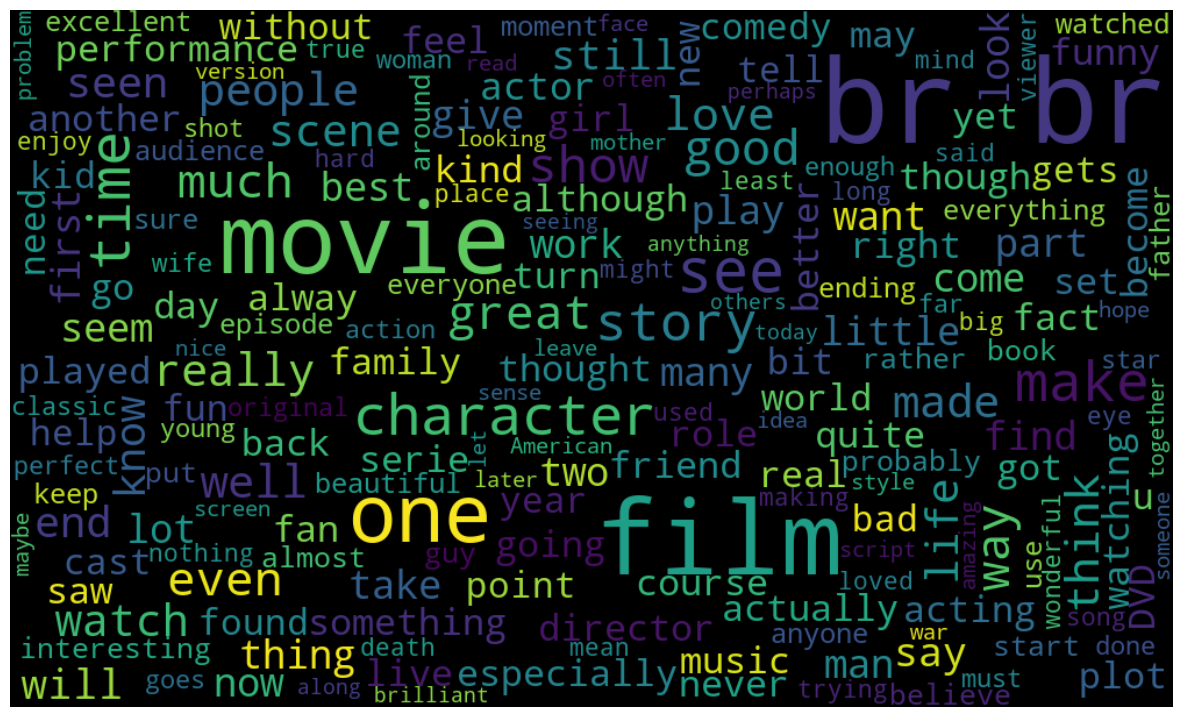

In [12]:
reviews = ' '.join(data['review'][data['sentiment'] == 'positive'].astype(str))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(height=600, width=1000, max_font_size=100).generate(reviews)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [14]:
reviews = cv.fit_transform(data['review']).toarray()

In [15]:
data['sentiment']=data['sentiment'].map({'Positive': 1, 'Negative': 0})

In [16]:
data['sentiment'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
reviews_train, reviews_test, sent_train, sent_test=train_test_split(reviews,data['sentiment'],test_size=0.2)

In [126]:
predict=model.predict(reviews_test)

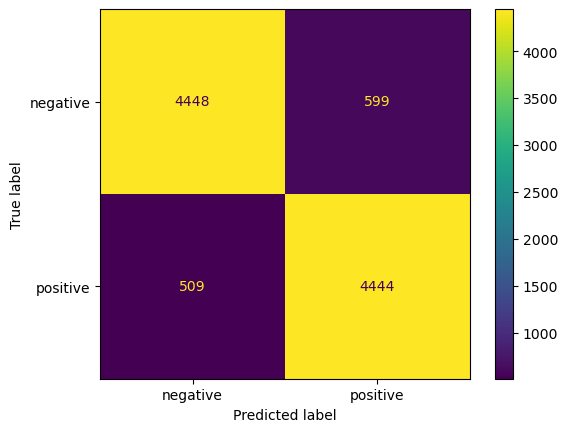

In [127]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sent_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

In [22]:
import pickle as pk

In [23]:
pk.dump(model,open('model.pk1','wb'))

In [24]:
pk.dump(cv,open('scaler.pk1','wb'))